In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import floor

In [2]:
pos = pd.read_csv('all_rbp_sequences.csv')
neg = pd.read_csv('all_neg_seqs.csv')

In [3]:
df_pos = pos[pos['RBP'] == 'K562.RBFOX2']
df_neg = neg[neg['RBP'] == 'K562.RBFOX2']

In [4]:
def get_gc(seq):
    count = 0
    for bp in seq:
        if bp == 'C' or bp == 'G':
            count += 1
    
    gc_bin = floor(5*count/len(seq))/5
    if gc_bin == 1:
        gc_bin == .8
    
    return gc_bin

In [5]:
gc_pos, gc_neg = [], []
len_pos, len_neg = [], []

for i in df_pos['sequence']:
    gc_pos.append(get_gc(i))
    len_pos.append(len(i))
    
for i in df_neg['sequence']:
    gc_neg.append(get_gc(i))
    len_neg.append(len(i))

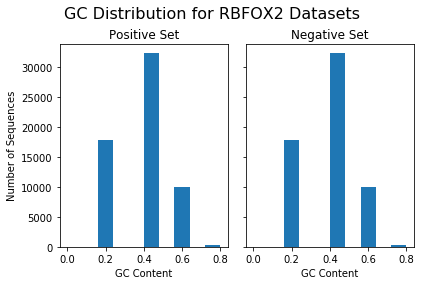

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("GC Distribution for RBFOX2 Datasets", fontsize=16)

axs[0].hist(gc_pos)
axs[1].hist(gc_neg)

axs[0].set_title('Positive Set')
axs[1].set_title('Negative Set')

axs[0].set(xlabel='GC Content', ylabel='Number of Sequences')
axs[1].set(xlabel='GC Content')

fig.tight_layout()
fig.subplots_adjust(top=0.85)

#fig.savefig('gc.png')

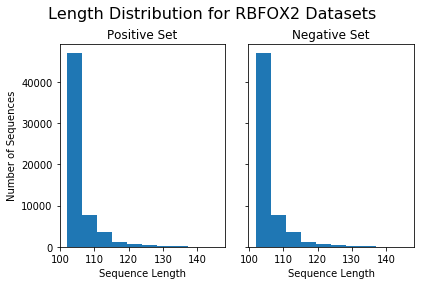

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("Length Distribution for RBFOX2 Datasets", fontsize=16)

axs[0].hist(len_pos)
axs[1].hist(len_neg)

axs[0].set_title('Positive Set')
axs[1].set_title('Negative Set')

axs[0].set(xlabel='Sequence Length', ylabel='Number of Sequences')
axs[1].set(xlabel='Sequence Length')

fig.tight_layout()
fig.subplots_adjust(top=0.85)

### generate all plots 

In [ ]:
def gen_plot(RBP, path):
    df_pos = pos[pos['RBP'] == RBP]
    df_neg = neg[neg['RBP'] == RBP]
    
    gc_pos, gc_neg = [], []
    len_pos, len_neg = [], []

    for i in df_pos['sequence']:
        gc_pos.append(get_gc(i))
        len_pos.append(len(i))

    for i in df_neg['sequence']:
        gc_neg.append(get_gc(i))
        len_neg.append(len(i))
        
    #plot gc graph    
    fig, axs = plt.subplots(1, 2, sharey=True)
    title = "GC Distribution for " + RBP + " Datasets"
    fig.suptitle(title, fontsize=16)
    axs[0].hist(gc_pos)
    axs[1].hist(gc_neg)
    axs[0].set_title('Positive Set')
    axs[1].set_title('Negative Set')
    axs[0].set(xlabel='GC Content', ylabel='Number of Sequences')
    axs[1].set(xlabel='GC Content')
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    file = path + '/' + RBP + '_gc.png'
    fig.savefig(file)
    
    
    #plot len graph
    fig, axs = plt.subplots(1, 2, sharey=True)
    title = "Length Distribution for " + RBP + " Datasets"
    fig.suptitle(title, fontsize=16)
    axs[0].hist(gc_pos)
    axs[1].hist(gc_neg)
    axs[0].set_title('Positive Set')
    axs[1].set_title('Negative Set')
    axs[0].set(xlabel='Sequence Length', ylabel='Number of Sequences')
    axs[1].set(xlabel='Sequence Length')
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    file = path + '/' + RBP + '_len.png'
    fig.savefig(file)

In [ ]:
import os

path = 'NEGATIVE/plots'
if not os.path.exists(path):
    os.mkdir(path)
    
for RBP in set(pos['RBP']):
    get_plot(RBP,path)